# DDV Assignment 2, Lim Wee Liang Kelven, S10221788K

## Directory <a id = "top"></a>

### 1. [Getting Started](#part1)
- [1.1 Project Objectives](#part1.1)
- [1.2 Background](#part1.2)
- [1.3 Data Preparation](#part1.3)
 - [1.3.1 Loading Data](#part1.3.1)
 - [1.3.2 Convert all the column names to standardised lower case and snakecase convention](#part1.3.2)
- [1.4 Cleaning Data](#part1.4)
 - [1.4.1 View column names and check data types of the columns](#part1.4.1)
 - [1.4.2 Check for null values](#part1.4.2)
- [1.5 Create or replace data](#part1.5)
- [1.6 Create a backup](#part1.6)

### 2. [Visualisations](#part2)
- [2.1 Exploratory Question](#part2.1)
- [2.2 What were the sales in the past 5 years?](#part2.2)
- [2.3 What are the sales in each month in each year?](#part2.3)
 - [2.3.1 Revenue](#part2.3.1)
 - [2.3.2 Profits](#part2.3.2)
- [2.4 What are the sales from the top 5 countries?](#part2.4)
- [2.5 When do orders generate the most?](#part2.5)
- [2.6 What is the average number of items per order?](#part2.6)
- [2.7 Which country generates the most orders?](#part2.7)
- [2.8 Which country generates the most revenue?](#part2.8)
- [2.9 Which category generated the most revenue and profit?](#part2.9)
- [2.10 What is the distribution of revenue in each category?](#part2.10)
- [2.11 Which category is popular?](#part2.11)
- [2.12 Which customer generated the most revenue and profit?](#part2.12)
- [2.13 Which is the most popular shipper?](#part2.13)
- [2.14 How does freight cost change over time for each shipper?](#part2.14)
- [2.15 How often is each shipper used in each country?](#part2.15)

### 3. [Dashboards](#part3)
- [Dashboard 1](#part3.1)
- [Dashboard 2](#part3.2)
- [Dashboard 3](#part3.3)
- [Dashboard 4](#part3.4)
- [Dashboard 5](#part3.5)

### 4. [Recommendations to increase sales in 2019](#part4)
- [4.1 Recommendation 1](#part4.1)
- [4.2 Recommendation 2](#part4.2)
- [4.3 Recommendation 3](#part4.3)
- [4.4 Recommendation 4](#part4.4)
- [4.5 Recommendation 5](#part4.5)

# 1. Getting Started <a id = "part1"></a>

## 1.1 Project Objectives <a id ="part1.1"></a>

[Back to top](#top)

After reading through this report, you should be able to:

1. Learn why data needs to be cleaned
2. Infer what visualisations show
3. Derive key insights from visualisations
4. Create recommendations to increase revenue/profit

## 1.2 Background <a id ="part1.2"></a>

[Back to top](#top)

You are a Data Analyst working for DART Pte Ltd, a wholesale business specializing in 
Clothes and Footwear. You are now in the last quarter of 2018, and you are planning for 2019. 
Your IT department has sent you the “Dart Sales Transactional Data” from 2014 to 2018. 
You decided to explore the data and visualize it so that you can understand the trend for the 
past 5 years. Based on the findings, you need to recommend interventions in 2019 to increase 
revenue/profit.

## 1.3 Data Preparation <a id ="part1.3"></a>

[Back to top](#top)

Before we start preparing the data, we first have to import the pandas, numpy, matplotlob, gridspec, seaborn, and plotly libraries.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.graph_objects as go

# The inline magic function enables plots to appear directly below the cell 
%matplotlib inline

import numpy as np
import pandas as pd

### 1.3.1 Loading Data <a id ="part1.3.1"></a>

[Back to top](#top)

In [2]:
# Load Dart Sales Transactional Data into a pandas dataframe from a csv file
filename = 'Dart Sales Transactional Data.csv'
df = pd.read_csv(filename)

### 1.3.2 Convert all the column names to standardised lower case and snakecase convention <a id ="part1.3.2"></a>

[Back to top](#top)

In [3]:
# Convert all columns naming to lowercase and replace spaces with underscores
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

## 1.4 Cleaning data <a id ="part1.4"></a>

[Back to top](#top)

After loading the data, we need to check if there are any `null` values and if the columns are in the correct data type because wrong data will affect the resulting visualisations they create.

### 1.4.1 View column names and check data types of the columns <a id ="part1.4.1"></a>

[Back to top](#top)

The `.info()` function is used to view the items and data type of each column.

In [4]:
# View number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   orderid                          2172 non-null   int64  
 1   order_year                       2172 non-null   int64  
 2   order_quarter                    2172 non-null   object 
 3   order_month                      2172 non-null   object 
 4   order_day                        2172 non-null   int64  
 5   customer_name                    2172 non-null   object 
 6   customer_country                 2172 non-null   object 
 7   customer_city                    2172 non-null   object 
 8   productname                      2172 non-null   object 
 9   product_categoryname             2172 non-null   object 
 10  quantity                         2172 non-null   int64  
 11  unitprice_in_usd                 2172 non-null   float64
 12  unit_discount_in_%  

### 1.4.2 Check for null values <a id ="part1.4.2"></a>

[Back to top](#top)

Using the `.isnull()` function, columns with `null` values will return `True` and columns without `null` values return `False`. If there are `null` values, we can replace them with suitable values.

The `.any()` function is also used to check all the columns instead of checking one column at a time.

In [5]:
# Check to make sure that there are no missing values in our dataframe
df.isnull().any()

orderid                            False
order_year                         False
order_quarter                      False
order_month                        False
order_day                          False
customer_name                      False
customer_country                   False
customer_city                      False
productname                        False
product_categoryname               False
quantity                           False
unitprice_in_usd                   False
unit_discount_in_%                 False
unitcost_in_usd                    False
shipper_name                       False
freight_cost_(paid_by_customer)    False
dtype: bool

#### Alternative way to check for `null`

We can also check for `null` values using `.sum()` method as shown below. It shows the number of `null` values in each column as compared to just showing if `null` values are present.

In [6]:
print(df.isnull().sum())

orderid                            0
order_year                         0
order_quarter                      0
order_month                        0
order_day                          0
customer_name                      0
customer_country                   0
customer_city                      0
productname                        0
product_categoryname               0
quantity                           0
unitprice_in_usd                   0
unit_discount_in_%                 0
unitcost_in_usd                    0
shipper_name                       0
freight_cost_(paid_by_customer)    0
dtype: int64


## 1.5 Create or replace data <a id ="part1.5"></a>

[Back to top](#top)

Since there are no null values and all the data types are correct, no replacement of data is needed.

However, we need to create 2 columns (`revenue` and `profits`) as they will be used in many calculations later on.

The code cell below creates the columns based on UnitPrice, Quantity, Unit Discount, and UnitCost. They will be added into our dataframe instead of the CSV file because we assume that most individuals only have viewing rights to the CSV file and are unable to make edits.

In [7]:
df['revenue'] = df['unitprice_in_usd'] * df['quantity'] * (1 - df['unit_discount_in_%'])
df['profits'] = df['revenue'] - (df['unitcost_in_usd'] * df['quantity'])

## 1.6 Create a backup <a id ="part1.6"></a>

[Back to top](#top)

A backup will be created using the `.copy()` function. 

This backup allows us to revert any changes if necessary.

In [8]:
# Create a backup
df_bkup = df.copy()

# 2. Visualisations <a id ="part2"></a>

[Back to top](#top)

Now that we have checked if there are null values and if the columns are in the correct data type, we can move on to creating the visualisations.

## 2.1 Exploratory Questions <a id ="part2.1"></a>

[Back to top](#top)

Before creating any visualisations, we first have to ideate possible questions that may aid us in creating them.

Below are some possible questions that may help us.

- What were the sales in the past 5 years?
- What were the sales in each year?
- What were the sales from the top 5 countries?
- When do orders generate the most?
- What is the average number of items per order?
- Which country generated the most orders?
- Which country generated the most revenue?
- Which product category generated the most revenue and profit?
- What is the distribution of revenue in each product category?
- Which product category is popular?
- Which customer generated the most revenue and profit?
- Which shipper is the most popular?
- How is the distribution of freight cost for each shipper?
- How often is each shipper used in each country?

The code cell below is ran first to create variables that are used some visualisations to avoid repitition.

In [9]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy = (each.get_x() + each.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

## 2.2 What were the sales in the past 5 years? <a id ="part2.2"></a>

[Back to top](#top)

This visualisation aims to answer the question: `What were the sales in the past 5 years?`

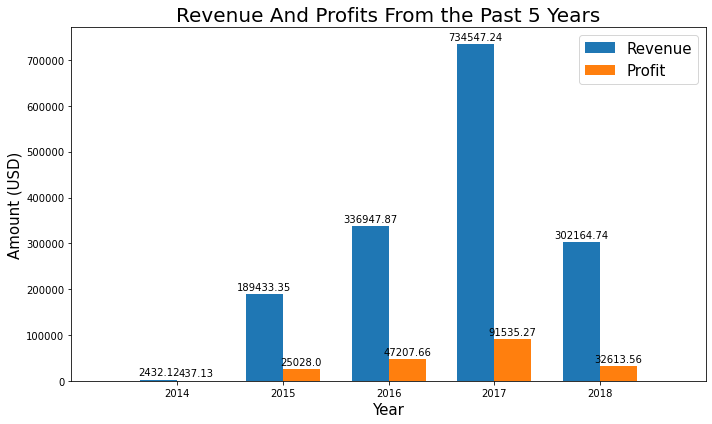

In [10]:
# Retrieve data to create the plot
revenue = df.groupby('order_year')['revenue'].sum().round(decimals = 2)
profits = df.groupby('order_year')['profits'].sum().round(decimals = 2)
year = profits.index

# Set the label locations and width of the bars
x = np.arange(len(year))
width = 0.35

# Create a figure and subplot, set figure size to 10 by 6
fig, ax = plt.subplots(figsize = (10, 6))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, revenue, width, label = 'Revenue')
bar2 = ax.bar(x + width/2, profits, width, label = 'Profit')

# Customise the plot
ax.set_title('Revenue And Profits From the Past 5 Years', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Amount (USD)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(year)
ax.set_xlim(left = -1, right = 5)
ax.legend(fontsize = 15)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy = (each.get_x() + each.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
        
# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

From the dual-bar chart as shown above, we can see the <font color = 'blue'>revenue</font> and <font color = 'orange'>profits</font> from the past 5 years.

We can also see that the best performing year was 2017, while the worst was 2014. 

Since transaction data in 2014 started in November, it does not show the true sales data and explains why so few sales were shown. For 2018, transaction data stopped during July, and hence also does not show the true sales data.

We can also see that after 2017, both revenue and profit decreased by more than 50% in 2018. This tells us that sales have been underperforming since 2017

## 2.3 What are the sales in each month in each year? <a id ="part2.3"></a>

[Back to top](#top)

The following 2 visualisations aim to answer the question: `What are the sales in each year?`

For years 2014 and 2018, some sales were not made in certain months. And as such, this can lead to an error with making the visualisation as the dimensions of the dataframes in each year are not the same.

The code below is used to convert the `order_month` column into a categorical column. And as such, aggregate values (revenue and profits) for months with no sales will be 0.

In [11]:
# Converts 'order_month' column into a categorical column
df['order_month'] = pd.Categorical(df['order_month'], categories = month, ordered = True)

This cell is used filter the dataframe by year then retrieve and calculate the revenue and profits in each year.

In [12]:
# Retrieve data from each year
#2014
year2014 = df[df['order_year'] == 2014]
revenue2014 = year2014.groupby('order_month')['revenue'].sum()
profits2014 = year2014.groupby('order_month')['profits'].sum()

#2015
year2015 = df[df['order_year'] == 2015]
revenue2015 = year2015.groupby('order_month')['revenue'].sum()
profits2015 = year2015.groupby('order_month')['profits'].sum()

#2016
year2016 = df[df['order_year'] == 2016]
revenue2016 = year2016.groupby('order_month')['revenue'].sum()
profits2016 = year2016.groupby('order_month')['profits'].sum()

#2017
year2017 = df[df['order_year'] == 2017]
revenue2017 = year2017.groupby('order_month')['revenue'].sum()
profits2017 = year2017.groupby('order_month')['profits'].sum()

#2018
year2018 = df[df['order_year'] == 2018]
revenue2018 = year2018.groupby('order_month')['revenue'].sum()
profits2018 = year2018.groupby('order_month')['profits'].sum()

After calculating the values, they are used to create 2 line charts: one for revenue, and the other for profits.

### 2.3.1 What are the revenues in each year? <a id ="part2.3.1"></a>

[Back to top](#top)

This first chart is used to show the revenue in each month from each year.

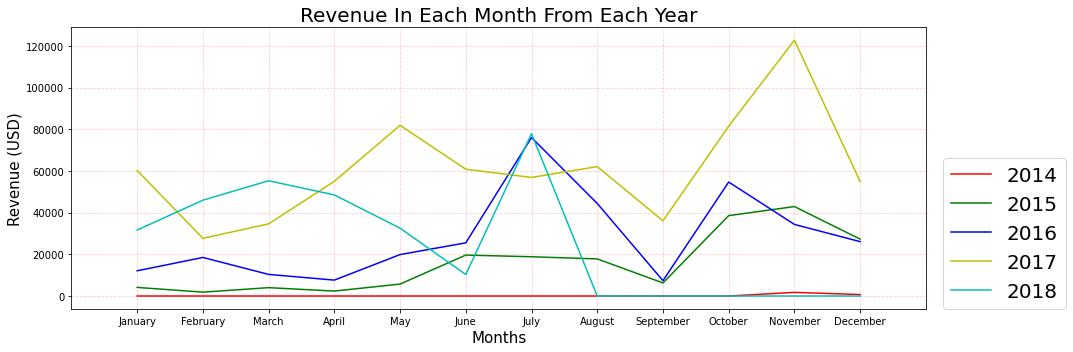

In [13]:
# Create a figure and subplot, set figure size to 15 by 5
fig, ax = plt.subplots(figsize = (15, 5))

# Create one plot containing line charts for revenues for each year
ax.plot(month, revenue2014, c = 'r', label = '2014')
ax.plot(month, revenue2015, c = 'g', label = '2015')
ax.plot(month, revenue2016, c = 'b', label = '2016')
ax.plot(month, revenue2017, c = 'y', label = '2017')
ax.plot(month, revenue2018, c = 'c', label = '2018')

# Set appropriate title for plot
ax.set_title('Revenue In Each Month From Each Year', fontsize = 20)

# Set labels for x-axis and y-axis
ax.set_xlabel('Months', fontsize = 15)
ax.set_ylabel('Revenue (USD)', fontsize = 15)

# Set font size of ticks on the x-axis and y-axis
ax.tick_params(axis = 'both', labelsize = 10)

# Set appropriate ranges for the x-axis
ax.set_xlim(left = -1, right = 12)

# Set grid lines to red, 0.2 transparency and dashed linestyle
ax.grid(c = 'r', alpha = .2, linestyle = '--')

# Set appropriate appropriate position for the legend
ax.legend(loc = (1.02, 0), borderaxespad = 0, fontsize = 20)

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

### 2.3.2 What are the profits in each year? <a id ="part2.3.2"></a>

[Back to top](#top)

This second chart is used to show the profits in each month from each year

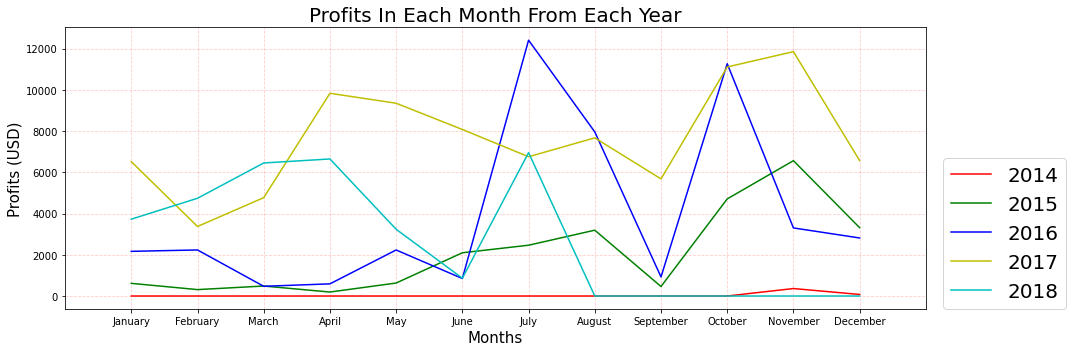

In [14]:
# Create a figure and subplot, set figure size to 15 by 5
fig, ax = plt.subplots(figsize = (15, 5))

# Create one plot containing line charts for revenues for each year
ax.plot(month, profits2014, c = 'r', label = '2014')
ax.plot(month, profits2015, c = 'g', label = '2015')
ax.plot(month, profits2016, c = 'b', label = '2016')
ax.plot(month, profits2017, c = 'y', label = '2017')
ax.plot(month, profits2018, c = 'c', label = '2018')

# Set appropriate title for plot
ax.set_title('Profits In Each Month From Each Year', fontsize = 20);

# Set labels for x-axis and y-axis
ax.set_xlabel('Months', fontsize = 15)
ax.set_ylabel('Profits (USD)', fontsize = 15)

# Set font size of ticks on the x-axis and y-axis
ax.tick_params(axis = 'both', labelsize = 10)

# Set appropriate ranges for the x-axis
ax.set_xlim(left = -1, right = 12)

# Set grid lines to red, 0.2 transparency and dashed linestyle
ax.grid(c = 'r', alpha = .2, linestyle = '--')

# Set appropriate appropriate position for the legend
ax.legend(loc = (1.02, 0), borderaxespad = 0, fontsize = 20)

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

Both are line charts and they show their respective sales data in each month for each year. The years are represented by the different coloured lines.

In both line charts, the data seem eratic and unstable throughout the years. Even considering years with transaction data from January to December (<font color = 'green'>2015</font>, <font color = 'blue'>2016</font>, <font color = 'yellow'>2017</font>), there is no clear correlation.

However, both charts seem to follow each other during August to October. Both have a similar trend where sales dropped from August to September, and increased from September to October.

Both charts tell us that sales are not consistent.

## 2.4 What are the sales in the top 5 countries? <a id ="part2.4"></a>

[Back to top](#top)

This visualisation aims to answer the question: `What are the sales in each country?`

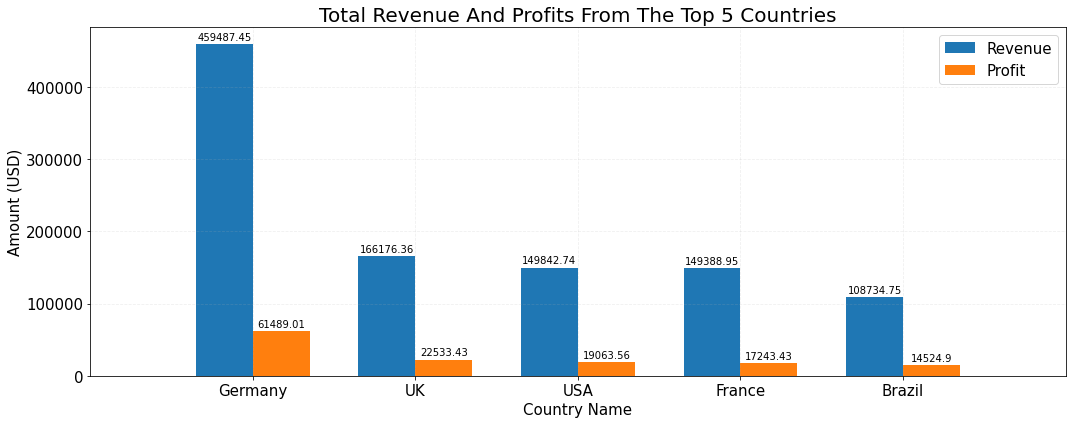

In [15]:
# Retrieve data to create the plot
revenue = df.groupby('customer_country')['revenue'].sum().round(decimals = 2)
revenue = revenue.nlargest(5)
profits = df.groupby('customer_country')['profits'].sum().round(decimals = 2)
profits = profits.nlargest(5)
country = profits.index

# Set the label locations and width of the bars
x = np.arange(len(country))
width = 0.35

# Create a figure and subplot, set figure size to 15 by 6
fig, ax = plt.subplots(figsize = (15, 6))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, revenue, width, label = 'Revenue')
bar2 = ax.bar(x + width/2, profits, width, label = 'Profit')

# Customise the plot
ax.set_title('Total Revenue And Profits From The Top 5 Countries', fontsize = 20)
ax.set_xlabel('Country Name', fontsize = 15)
ax.set_ylabel('Amount (USD)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(country)
ax.set_xlim(left = -1, right = 5)
ax.legend(fontsize = 15)

# Set font size of ticks on the x-axis and y-axis
ax.tick_params(axis = 'both', labelsize = 15)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy = (each.get_x() + each.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
        
# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Turn grid on
ax.grid(alpha = 0.2, linestyle = '--')

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

From the dual-bar chart above shows the total <font color = 'blue'>revenue</font> and <font color = 'orange'>profits</font> generated of the top 5 countries from 2014 to 2018.

We can also see that Germany generated the most sales while Brazil is fifth in sales generation.

## 2.5 When do orders generate the most? <a id ="part2.5"></a>

[Back to top](#top)

This visualisation aims to answer the question: `When do orders generate the most?`

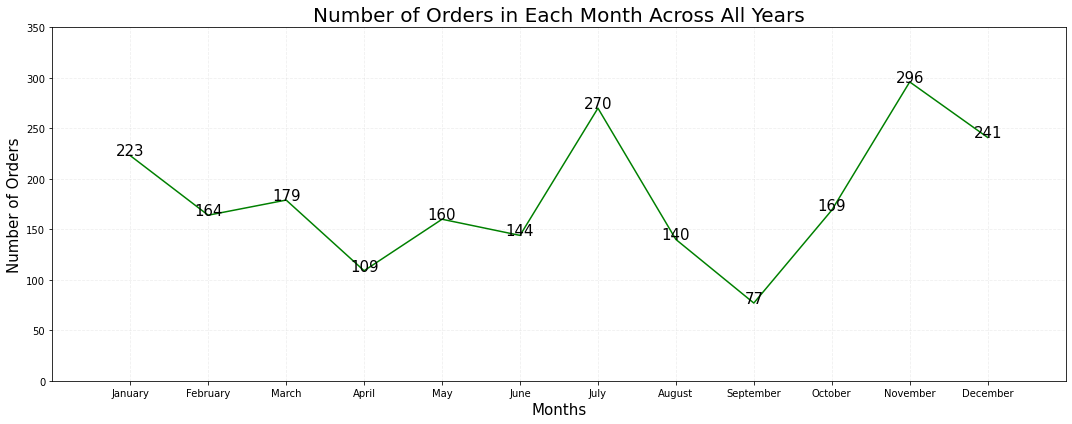

In [16]:
# Retrieve data to create the plot
orders = df.groupby('order_month')['orderid'].count()

# Create a figure and subplot, set figure size to 15 by 6
fig, ax = plt.subplots(figsize = (15, 6))

# Plot line
ax.plot(month, orders, 'g', label = 'Number of Orders')

# Customise the plot
ax.set_title('Number of Orders in Each Month Across All Years', fontsize = 20)
ax.set_xlabel('Months', fontsize = 15)
ax.set_ylabel('Number of Orders', fontsize = 15)
ax.set_xlim(left = -1, right = 12)
ax.set_ylim(bottom = 0, top = 350)

# Label the points
for x, y in zip(month, orders): # zip joins x and y coordinates in pairs
    label = y # value of data label to display
    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords = "offset points", # define how to position the text
                 xytext = (0, 0), # distance from text to points (x,y)
                 ha = 'center', # horizontal alignment can be left, right or center
                 size = 15) 
    
# Turn grid on
ax.grid(alpha = 0.2, linestyle = '--')

# Set tight layout for figure
fig.tight_layout()

# Display the plot 
plt.show()

This line chart above shows the number of orders made in each month from 2014 to 2018 combined.

This visualisation tells us that most orders were made during July, November, and December. 

Additionally, we can see an increase of close to double from June to July, followed by a sharp decrease from July to September, followed by steep increase in orders from September to November.

## 2.6 What is the average number of items per order? <a id ="part2.6"></a>

[Back to top](#top)

This visualisation aims to answer the question: `What are the average number of items per order?`

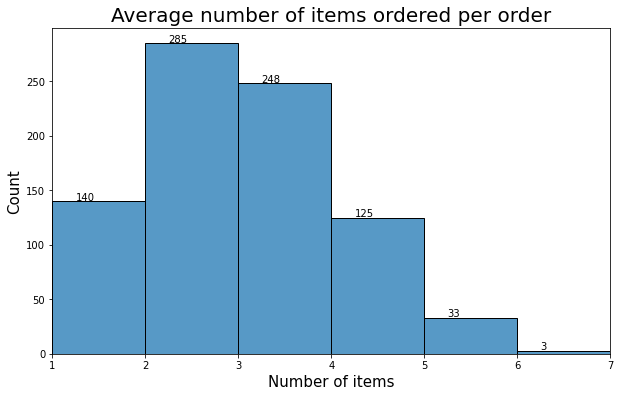

In [17]:
# Retrieve data to create the plot
no_of_items = df.groupby('orderid')['orderid'].count()

# Create a figure and subplot, set figure size to 10 by 6
fig, ax = plt.subplots(figsize = (10, 6))

# Plot a histogram and binwidth
ax = sns.histplot(no_of_items, binwidth = 1)

# Show count for each bin
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1))

# Customise plot
ax.set_title("Average number of items ordered per order", fontsize = 20)
ax.set_xlabel('Number of items', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlim(left = 1, right = 7)

# Display the plot
plt.show()

The histogram above shows the number of items ordered per order (x-axis) and how often that number appears (y-axis).

We can see that most orders contain 2 to 3 items and rarely contain 5 to 6 items.

This tells us that most customers will order between 2 to 3 items.

## 2.7 Which country generates the most orders? <a id ="part2.7"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which country generates the most orders?`

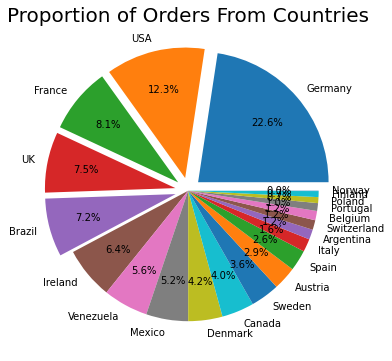

In [18]:
# Retrieve data to create the plot
country = df.groupby('customer_country')['orderid'].count()
country = country.sort_values(ascending = False)

# Create a figure and subplot, set figure size to 10 by 6
plt.figure(figsize = (10, 6))

# Customise the plot
plt.title('Proportion of Orders From Countries', fontsize = 20)

# Plot chart
plt.pie(country, 
        explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), 
        labels = country.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

# Display plot
plt.show()

The pie chart above shows the proportion of orders from each country differentiated by colour. The top 5 countries are popped out.

This visualisation shows us that most orders come from <font color = 'blue'>Germany</font>, <font color = 'orange'>United States</font>, <font color = 'green'>France</font>, <font color = 'red'>United Kingdom</font>, and <font color = 'purple'>Brazil</font>.

## 2.8 Which country generates the most revenue? <a id ="part2.8"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which country generates the most revenue?`

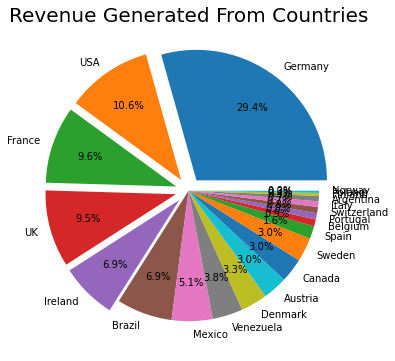

In [19]:
# Retrieve data to create the plot
revenue = df.groupby('customer_country')['revenue'].sum()
revenue = revenue.sort_values(ascending = False)

# Create a figure and subplot, set figure size to 10 by 6
plt.figure(figsize = (10, 6))

# Customise the plot
plt.title('Revenue Generated From Countries', fontsize = 20)

# Plot chart
plt.pie(revenue, 
        explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        labels = revenue.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

# Display plot
plt.show()

The pie chart above shows the proportion of revenue eearned from each country differentiated by colour. The top 5 countries are popped out.

From here, we can see that most revenue come from <font color = 'blue'>Germany</font>, <font color = 'orange'>United States</font>, <font color = 'green'>France</font>, <font color = 'red'>United Kingdom</font>, and <font color = 'purple'>Ireland</font>

The top 5 countries seem to follow a similarly to that from the visualisation about the poportion of orders from countries.

## 2.9 Which product category generated the most revenue and profit? <a id ="part2.9"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which category generated the most revenue and profit?`

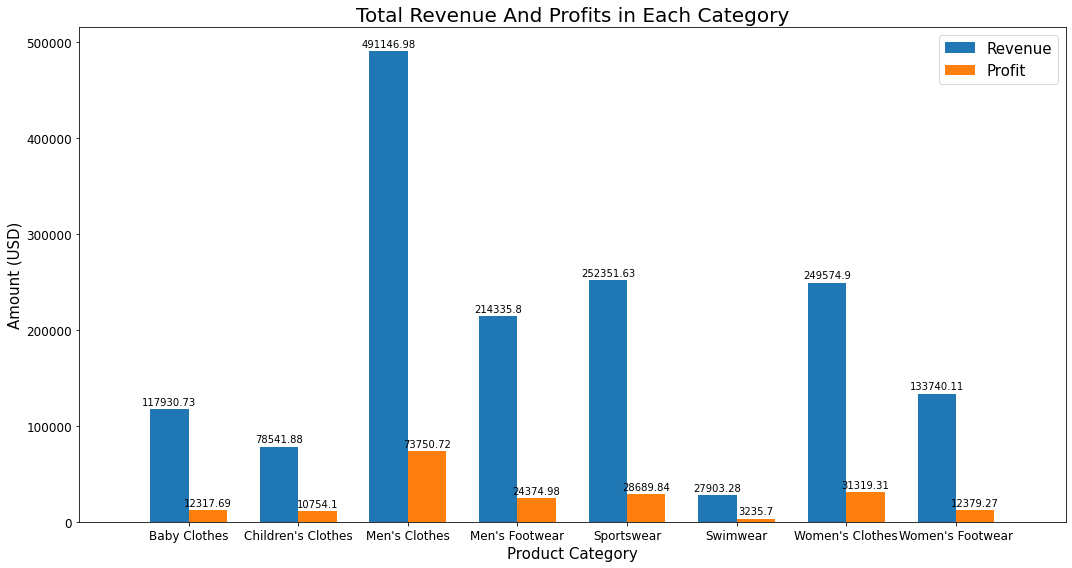

In [20]:
# Retrieve data to create the plot
revenue = df.groupby('product_categoryname')['revenue'].sum().round(decimals = 2)
profit = df.groupby('product_categoryname')['profits'].sum().round(decimals = 2)
category = revenue.index

# Set the label locations and width of the bars
x = np.arange(len(category))
width = 0.35

# Create a figure and subplot, set figure size to 15 by 8
fig, ax = plt.subplots(figsize = (15, 8))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, revenue, width, label = 'Revenue')
bar2 = ax.bar(x + width/2, profit, width, label = 'Profit')

# Customise the plot
ax.set_title('Total Revenue And Profits in Each Category', fontsize = 20)
ax.set_xlabel('Product Category', fontsize = 15)
ax.set_ylabel('Amount (USD)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(category)
ax.set_xlim(left = -1, right = 8)
ax.legend(fontsize = 15)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy = (each.get_x() + each.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
        
# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set font size of ticks on the x-axis and y-axis
ax.tick_params(axis = 'both', labelsize = 12)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

This dual-bar chart shows the <font color = 'blue'>revenue</font> and <font color = 'orange'>profits</font> earned in each product category from 2014 to 2018.

We can see that the most profitable category is Men's Clothes while the least profitable is Swimwear.

## 2.10 What is the distribution of revenue in each product category? <a id ="part2.10"></a>

[Back to top](#top)

This visualisation aims to answer the question: `What is the average revenue in each category?`

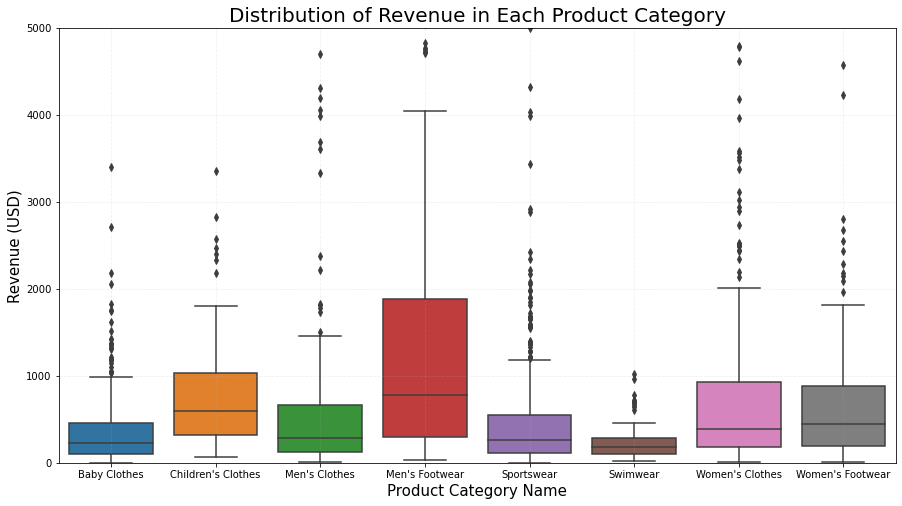

In [21]:
# Create a figure and subplot, set figure size to 15 by 8
fig, ax = plt.subplots(figsize = (15, 8))

# Plot the boxplot
df = df.sort_values('product_categoryname')
sns.boxplot(x = 'product_categoryname', y = 'revenue', data = df)

# Customise the plot
ax.set_title('Distribution of Revenue in Each Product Category', fontsize = 20)
ax.set_xlabel('Product Category Name', fontsize = 15)
ax.set_ylabel('Revenue (USD)', fontsize = 15)
ax.set_ylim(bottom = 0, top = 5000)

# Turn grid on
ax.grid(alpha = 0.2, linestyle = '--')

# Display plot
plt.show()

The box plot above shows the distribution of revenue earned by each product category from 2014 to 2018.

From the visualisation, we can see that Men's Footwear has the highst median revenue. However, since it has a highest IQR (as seen from the huge empty space), it has an inconsistent median revenue.

Swimwear on the other hand, has the lowest but most consistent median revenue.

## 2.11 Which category is popular?  <a id ="part2.11"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which category is popular?`

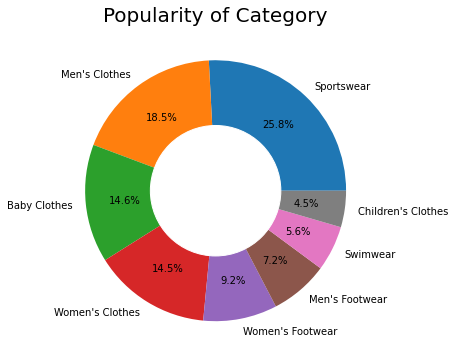

In [22]:
# Retrieve data to create the plot
category = df.groupby('product_categoryname')['orderid'].count()
category = category.sort_values(ascending = False)

# Create a figure and subplot, set figure size to 10 by 6
plt.figure(figsize = (10, 6))

# Customise the plot
plt.title('Popularity of Category', fontsize = 20)

# Plot chart
plt.pie(category,
        labels = category.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

# Create a white circle in the middle to make it look like a donut chart
c = plt.Circle((0, 0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(c)

# Display plot
plt.show()

The donut chart above shows the proportion of orders in each product categories.

We can see that Sportswear is the most popular with 25.8% while the least popular is Children's Clothes with 4.5%

## 2.12 Which customer generated the most revenue and profit? <a id ="part2.12"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which customer generated the most revenue and profit?`

This visualisation also shows the top 10 customers instead of all the customers

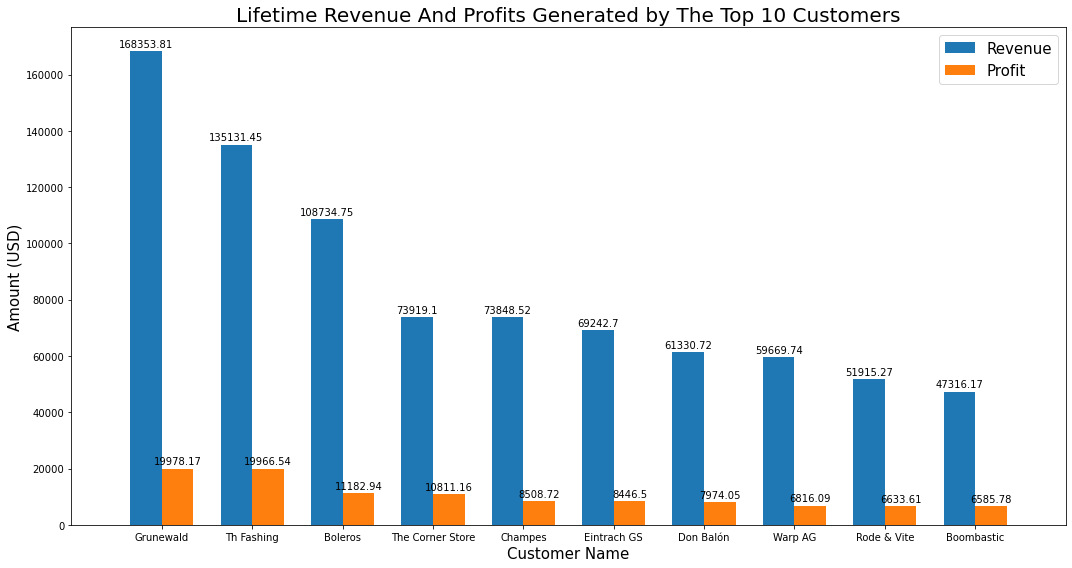

In [23]:
# Retrieve data to create the plot
revenue = df.groupby('customer_name')['revenue'].sum().round(decimals = 2)
revenue = revenue.nlargest(10)
customer = revenue.index
profit = df.groupby('customer_name')['profits'].sum().round(decimals = 2)
profit = profit.nlargest(10)

# Set the label locations and width of the bars
x = np.arange(len(customer))
width = 0.35

# Create a figure and subplot, set figure size to 15 by 8
fig, ax = plt.subplots(figsize = (15, 8))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, revenue, width, label = 'Revenue')
bar2 = ax.bar(x + width/2, profit, width, label = 'Profit')

# Customise the plot
ax.set_title('Lifetime Revenue And Profits Generated by The Top 10 Customers', fontsize = 20)
ax.set_xlabel('Customer Name', fontsize = 15)
ax.set_ylabel('Amount (USD)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(customer)
ax.set_xlim(left = -1, right = 10)
ax.legend(fontsize = 15)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy = (each.get_x() + each.get_width() / 2, height),
                    xytext = (0, 2),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

The dual-bar chart above shows the top 10 customers that contributed the most <font color = 'blue'>revenue</font> and <font color = 'orange'>profits</font>.

We can see that the customer that with the most Lifetime revenue and profits is Grunewald.

## 2.13 Which shipper is the most popular? <a id ="part2.13"></a>

[Back to top](#top)

This visualisation aims to answer the question: `Which shipper gets used the most?`

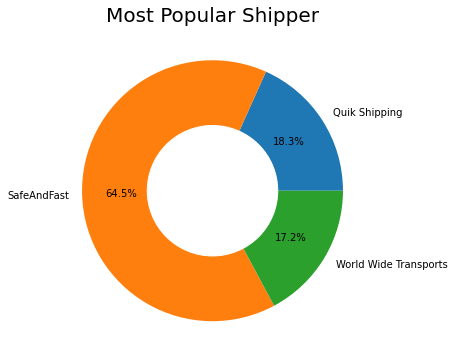

In [24]:
# Retrieve data to create the plot
country = df.groupby('shipper_name')['shipper_name'].count()

# Create a figure and subplot, set figure size to 10 by 6
plt.figure(figsize = (10, 6))

# Customise the plot
plt.title('Most Popular Shipper', fontsize = 20)

# Plot chart
plt.pie(country,
        labels = country.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

c = plt.Circle((0, 0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(c)

# Display plot
plt.show()

The donut chart above shows the how often a shipper is used.

This visualisation shows us that SafeAndFast is used the most while Quik Shipping and World Wide Transports are clost to even.

## 2.14 What is the distribution of freight cost for each shipper? <a id ="part2.14"></a>

[Back to top](#top)

This visualisation aims to answer the question: `How does freight cost change over time for each shipper?`

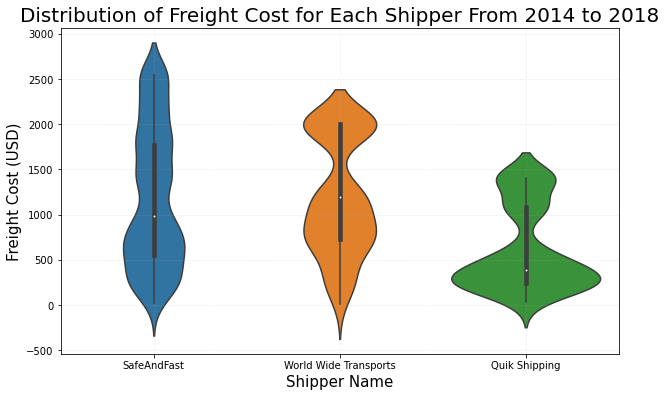

In [25]:
# Create a figure and subplot, set figure size to 10 by 6
fig, ax = plt.subplots(figsize = (10, 6))

# Violin plot
sns.violinplot(x = 'shipper_name', y = 'freight_cost_(paid_by_customer)', data = df)

# Customise plot
ax.set_title('Distribution of Freight Cost for Each Shipper From 2014 to 2018', fontsize = 20)
ax.set_ylabel('Freight Cost (USD)', fontsize = 15)
ax.set_xlabel('Shipper Name', fontsize = 15)

# Turn grid on
ax.grid(alpha = 0.2, linestyle = '--')

# Display the plot
plt.show()

This violin plot shows the distribution of freight cost for each shipper from 2014 to 2018 and each shipper is differentiated by colour.

This visualisation shows that <font color = 'green'>Quik Shipping</font> has the lowest median freight cost while <font color = 'orange'>World Wide Transports</font> has the highest.

## 2.15 How often is each shipper used in each country? <a id ="part2.15"></a>

[Back to top](#top)

This visualisation aims to answer the question: `How often is each shipper used in each country?`

Similar to the visualisations in [2.3](#part2.3), the code below is used to convert the customer_country column into a categorical column. And as such, aggregate values for countries with no use of a shipper will be 0.

In [26]:
df['customer_country'] = pd.Categorical(df['customer_country'], ordered = True)

The cell below is used to filter the dataframe by shipper name then calculates the number of times each name appears based on country.

In [27]:
# SafeAndFast
saf = df[df['shipper_name'] == 'SafeAndFast']
safcount = saf.groupby('customer_country')['shipper_name'].count()

# Quik Shipping
qs = df[df['shipper_name'] == 'Quik Shipping']
qscount = qs.groupby('customer_country')['shipper_name'].count()

# World Wide Transports
wwt = df[df['shipper_name'] == 'World Wide Transports']
wwtcount = wwt.groupby('customer_country')['shipper_name'].count()

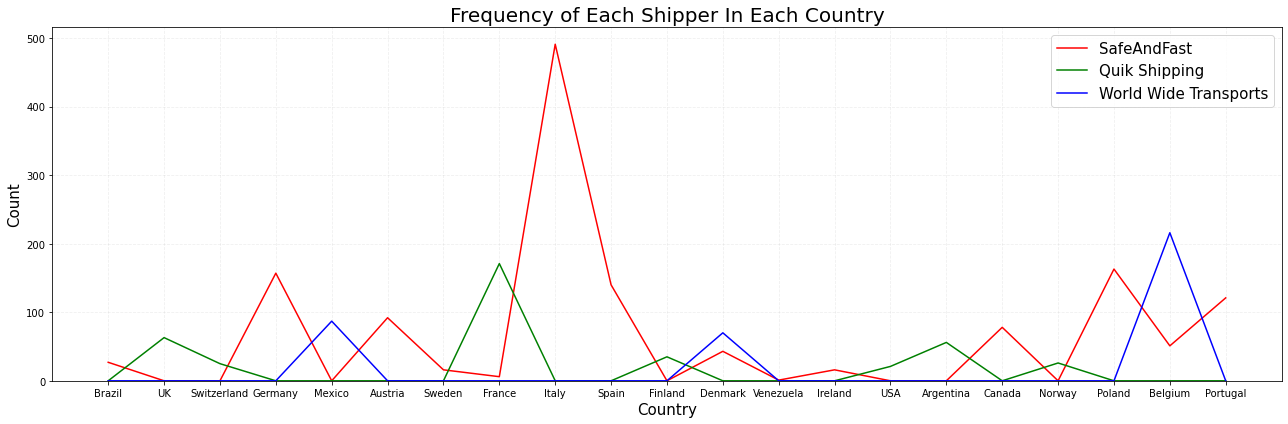

In [34]:
country = df['customer_country'].unique()
x = np.arange(len(country))

# Create a figure and subplot, set figure size to 18 by 6
fig, ax = plt.subplots(figsize = (18, 6))

# Plot lines
ax.plot(country, safcount, c = 'r', label = 'SafeAndFast')
ax.plot(country, qscount, c = 'g', label = 'Quik Shipping')
ax.plot(country, wwtcount, c = 'b', label = 'World Wide Transports')

# Customise the plot
ax.set_title('Frequency of Each Shipper In Each Country', fontsize = 20)
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(country)
ax.set_xlim(left = -1, right = 21)
ax.set_ylim(bottom = 0)
ax.legend(fontsize = 15)

# Turn grid on
ax.grid(alpha = 0.2, linestyle = '--')

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

The line chart above shows the number of times each shipper was used in each country. Each shipper is differentiated by colour.

Some countries only use no shippers, while some use all 3.

# Dashboards <a id ="part3"></a>

[Back to top](#top)

## Dashboard 1 <a id = 'part3.1'></a>

This dashboard uses visualisations from [2.2](#part2.2), [2.3](#part2.3), and [2.12](#part2.12)

[Back to top](#top)

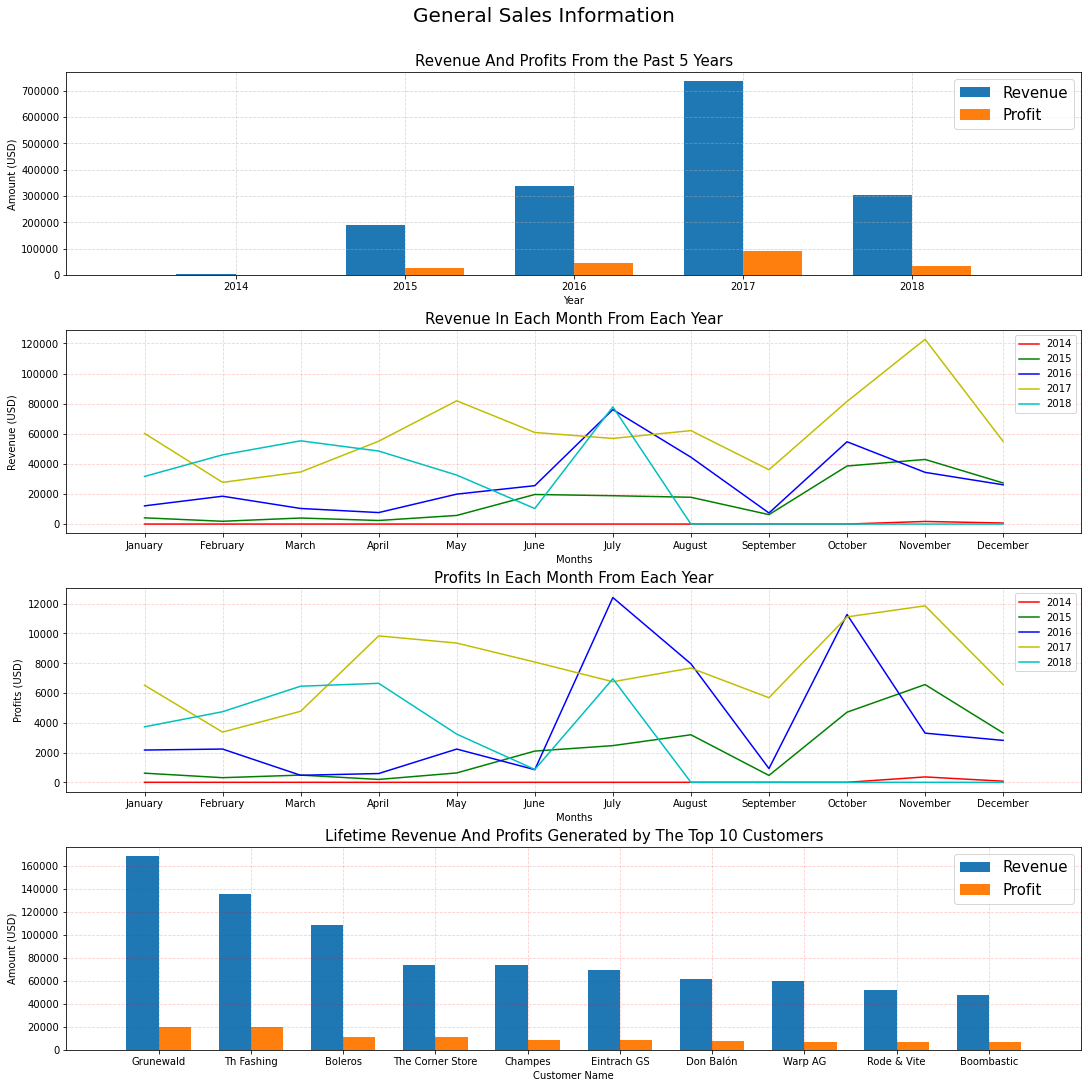

In [29]:
#create figure to be used as dashboard
fig = plt.figure(figsize = (15, 15), constrained_layout = True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 4, ncols = 1, figure = fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0, :])
ax1_revenue = df.groupby('order_year')['revenue'].sum()
ax1_profits = df.groupby('order_year')['profits'].sum()
x = np.arange(len(year))
width = 0.35
ax1_bar1 = ax1.bar(x - width/2, ax1_revenue, width, label = 'Revenue')
ax1_bar2 = ax1.bar(x + width/2, ax1_profits, width, label = 'Profit')
ax1.set_title('Revenue And Profits From the Past 5 Years', fontsize = 15)
ax1.set_xlabel('Year', fontsize = 10)
ax1.set_ylabel('Amount (USD)', fontsize = 10)
ax1.set_xticks(x)
ax1.set_xticklabels(year)
ax1.set_xlim(left = -1, right = 5)
ax1.grid(alpha = 0.5, linestyle = '--')
ax1.legend(fontsize = 15)

# Define second subplot
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(month, revenue2014, c = 'r', label = '2014')
ax2.plot(month, revenue2015, c = 'g', label = '2015')
ax2.plot(month, revenue2016, c = 'b', label = '2016')
ax2.plot(month, revenue2017, c = 'y', label = '2017')
ax2.plot(month, revenue2018, c = 'c', label = '2018')
ax2.set_title('Revenue In Each Month From Each Year', fontsize = 15)
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Revenue (USD)', fontsize = 10)
ax2.tick_params(axis = 'x', labelsize = 10)
ax2.tick_params(axis = 'y', labelsize = 10)
ax2.set_xlim(left = -1, right = 12)
ax2.grid(c = 'r', alpha = .2, linestyle = '--')
ax2.legend()

# Define third subplot
ax3 = fig.add_subplot(gs[2, :])
ax3.plot(month, profits2014, c = 'r', label = '2014')
ax3.plot(month, profits2015, c = 'g', label = '2015')
ax3.plot(month, profits2016, c = 'b', label = '2016')
ax3.plot(month, profits2017, c = 'y', label = '2017')
ax3.plot(month, profits2018, c = 'c', label = '2018')
ax3.set_title('Profits In Each Month From Each Year', fontsize = 15);
ax3.set_xlabel('Months', fontsize = 10)
ax3.set_ylabel('Profits (USD)', fontsize = 10)
ax3.tick_params(axis = 'x', labelsize = 10)
ax3.tick_params(axis = 'y', labelsize = 10)
ax3.set_xlim(left = -1, right = 12)
ax3.grid(c = 'r', alpha = .2, linestyle = '--')
ax3.legend()

# Define fourth subplot
ax4 = fig.add_subplot(gs[3, :])
ax4_revenue = df.groupby('customer_name')['revenue'].sum()
ax4_revenue = ax4_revenue.nlargest(10)
ax4_customer = ax4_revenue.index
ax4_profit = df.groupby('customer_name')['profits'].sum()
ax4_profit = ax4_profit.nlargest(10)
x = np.arange(len(ax4_customer))
width = 0.35
bar1 = ax4.bar(x - width/2, ax4_revenue, width, label = 'Revenue')
bar2 = ax4.bar(x + width/2, ax4_profit, width, label = 'Profit')
ax4.set_title('Lifetime Revenue And Profits Generated by The Top 10 Customers', fontsize = 15)
ax4.set_xlabel('Customer Name', fontsize = 10)
ax4.set_ylabel('Amount (USD)', fontsize = 10)
ax4.set_xticks(x)
ax4.set_xticklabels(ax4_customer)
ax4.set_xlim(left = -1, right = 10)
ax4.grid(c = 'r', alpha = .2, linestyle = '--')
ax4.legend(fontsize = 15)

# Set title of dashboard
fig.suptitle("General Sales Information\n", fontsize = 20)

# Display plot
plt.show()

## Dashboard 2 <a id = 'part3.2'></a>

This dashboard uses visualisations from [2.5](#part2.5) and [2.6](#part2.6)

[Back to top](#top)

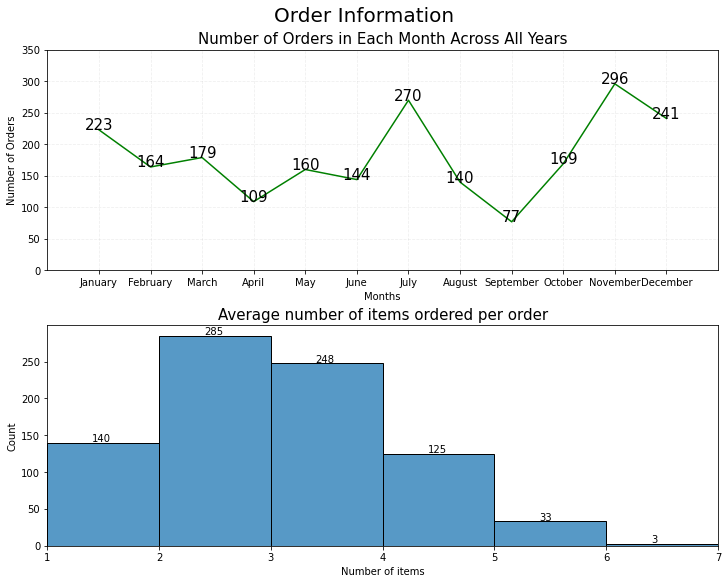

In [30]:
#create figure to be used as dashboard
fig = plt.figure(figsize = (10, 8), constrained_layout = True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 1, figure = fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0, :])
orders = df.groupby('order_month')['orderid'].count()
ax1.plot(month, orders, 'g', label = 'Number of Orders')
ax1.set_title('Number of Orders in Each Month Across All Years', fontsize = 15)
ax1.set_xlabel('Months', fontsize = 10)
ax1.set_ylabel('Number of Orders', fontsize = 10)
ax1.set_xlim(left = -1, right = 12)
ax1.set_ylim(bottom = 0, top = 350)
for x, y in zip(month, orders): # zip joins x and y coordinates in pairs
    label = y # value of data label to display
    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords = "offset points", # define how to position the text
                 xytext = (0, 0), # distance from text to points (x,y)
                 ha = 'center', # horizontal alignment can be left, right or center
                 size = 15) 
    
ax1.grid(alpha = 0.2, linestyle = '--')

# Define second subplot
ax2 = fig.add_subplot(gs[1, :])
no_of_items = df.groupby('orderid')['orderid'].count()
ax2 = sns.histplot(no_of_items, binwidth = 1)
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1))

ax2.set_title("Average number of items ordered per order", fontsize = 15)
ax2.set_xlabel('Number of items', fontsize = 10)
ax2.set_ylabel('Count', fontsize = 10)
ax2.set_xlim(left = 1, right = 7)

# Set title of dashboard
fig.suptitle("Order Information", fontsize = 20)

# Display plot
plt.show()

## Dashboard 3 <a id = 'part3.3'></a>

This dashboard uses visualisations from [2.4](#part2.4), [2.6](#part2.6), and [2.7](#part2.7)

[Back to top](#top)

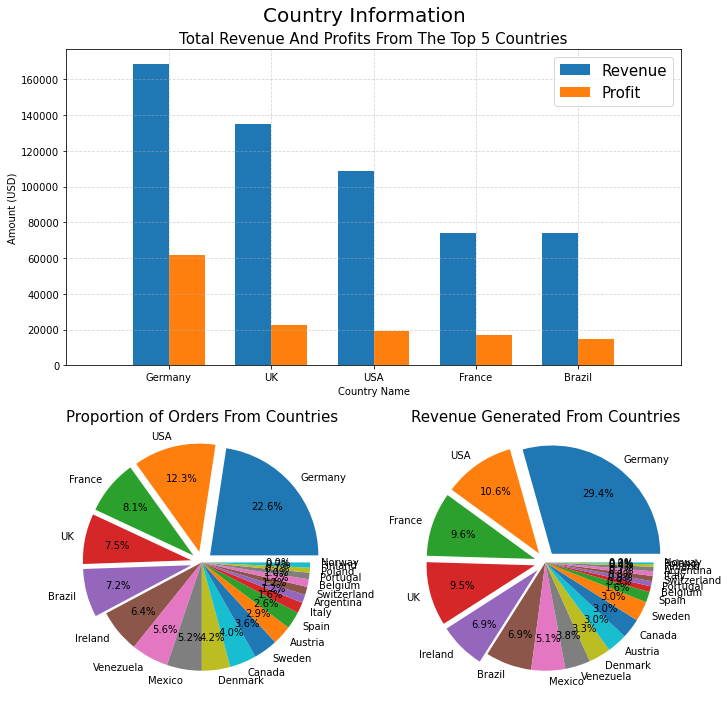

In [31]:
#create figure to be used as dashboard
fig = plt.figure(figsize = (10, 10), constrained_layout = True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 2, figure = fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0, :])
ax1_revenue = df.groupby('customer_country')['revenue'].sum()
ax1_revenue = revenue.nlargest(5)
ax1_profits = df.groupby('customer_country')['profits'].sum()
ax1_profits = profits.nlargest(5)
country = ax1_profits.index
x = np.arange(len(country))
ax1_bar1 = ax1.bar(x - width/2, ax1_revenue, width, label = 'Revenue')
ax1_bar2 = ax1.bar(x + width/2, ax1_profits, width, label = 'Profit')
ax1.set_title('Total Revenue And Profits From The Top 5 Countries', fontsize = 15)
ax1.set_xlabel('Country Name', fontsize = 10)
ax1.set_ylabel('Amount (USD)', fontsize = 10)
ax1.set_xticks(x)
ax1.set_xticklabels(country)
ax1.set_xlim(left = -1, right = 5)
ax1.legend(fontsize = 15)
ax1.grid(alpha = 0.5, linestyle = '--')

# Define second subplot
ax2 = fig.add_subplot(gs[1, 0])
country = df.groupby('customer_country')['orderid'].count()
country = country.sort_values(ascending = False)
plt.title('Proportion of Orders From Countries', fontsize = 15)
plt.pie(country, 
        explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), 
        labels = country.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

# Define third subplot
ax3 = fig.add_subplot(gs[1, 1])
revenue = df.groupby('customer_country')['revenue'].sum()
revenue = revenue.sort_values(ascending = False)
plt.title('Revenue Generated From Countries', fontsize = 15)
plt.pie(revenue, 
        explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        labels = revenue.index, 
        autopct='%1.1f%%',
        pctdistance = 0.7)

# Set title of dashboard
fig.suptitle("Country Information", fontsize = 20)

# Display plot
plt.show()

## Dashboard 4 <a id = 'part3.4'></a>

This dashboard uses visualisations from [2.9](#part2.9), [2.10](#part2.10), and [2.11](#part2.11)

[Back to top](#top)

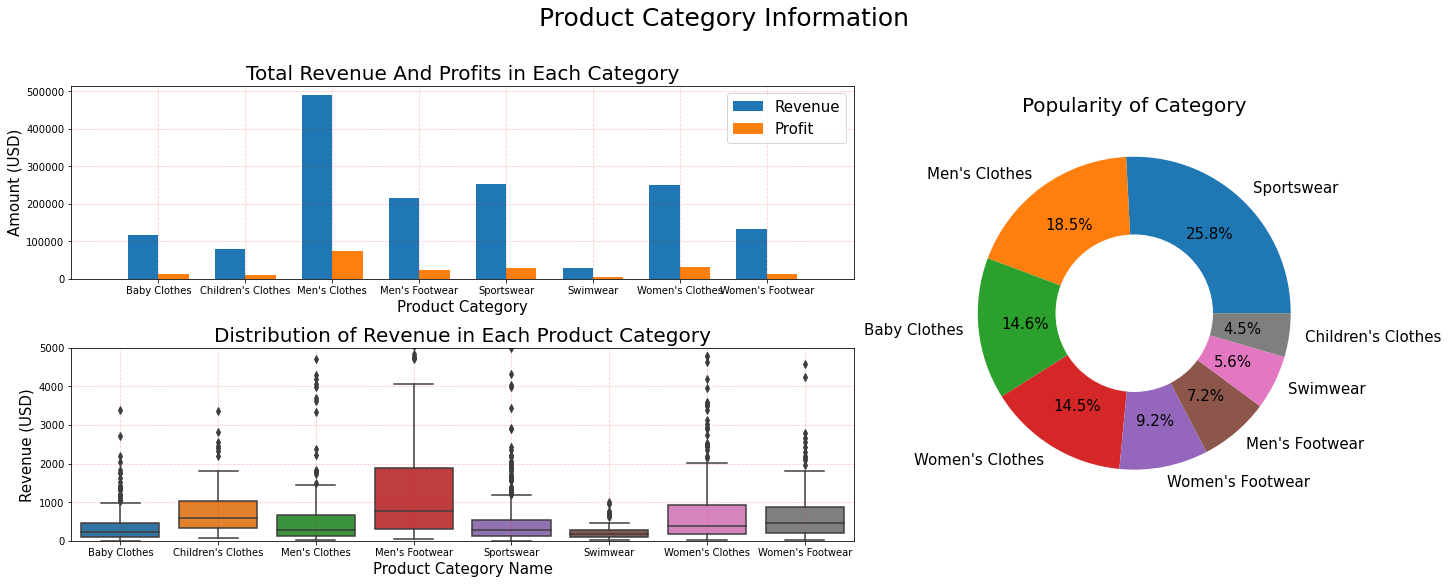

In [32]:
#create figure to be used as dashboard
fig = plt.figure(figsize = (20, 8), constrained_layout = True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 3, figure = fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0, :2])
ax1_revenue = df.groupby('product_categoryname')['revenue'].sum()
ax1_profit = df.groupby('product_categoryname')['profits'].sum()
category = ax1_profit.index
x = np.arange(len(category))
width = 0.35
ax1_bar1 = ax1.bar(x - width/2, ax1_revenue, width, label = 'Revenue')
ax1_bar2 = ax1.bar(x + width/2, ax1_profit, width, label = 'Profit')
ax1.set_title('Total Revenue And Profits in Each Category', fontsize = 20)
ax1.set_xlabel('Product Category', fontsize = 15)
ax1.set_ylabel('Amount (USD)', fontsize = 15)
ax1.set_xticks(x)
ax1.set_xticklabels(category)
ax1.set_xlim(left = -1, right = 8)
ax1.grid(c = 'r', alpha = .2, linestyle = '--')
ax1.legend(fontsize = 15)

# Define second subplot
ax2 = fig.add_subplot(gs[1, :2])
df = df.sort_values('product_categoryname')
sns.boxplot(x = 'product_categoryname', y = 'revenue', data = df)
ax2.set_title('Distribution of Revenue in Each Product Category', fontsize = 20)
ax2.set_xlabel('Product Category Name', fontsize = 15)
ax2.set_ylabel('Revenue (USD)', fontsize = 15)
ax2.set_ylim(bottom = 0, top = 5000)
ax2.grid(c = 'r', alpha = 0.2, linestyle = '--')

# Define third subplot
ax3 = fig.add_subplot(gs[:, 2])
ax3_category = df.groupby('product_categoryname')['orderid'].count()
ax3_category = ax3_category.sort_values(ascending = False)
plt.title('Popularity of Category', fontsize = 20)
plt.pie(ax3_category, labels = ax3_category.index, autopct='%1.1f%%', pctdistance = 0.7, textprops = {'fontsize': 15})
c = plt.Circle((0, 0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(c)

# Set title of dashboard
fig.suptitle("Product Category Information\n", fontsize = 25)

# Display plot
plt.show()

## Dashboard 5 <a id = 'part3.5'></a>

This dashboard uses visualisations from [2.13](#part2.13), [2.14](#part2.14), and [2.15](#part2.15)

[Back to top](#top)

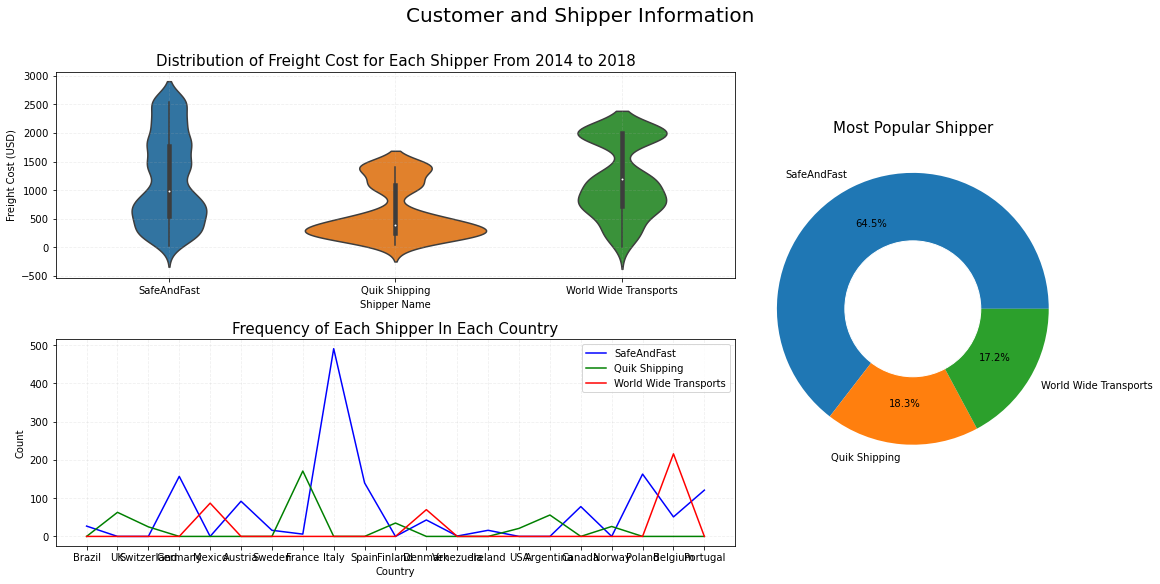

In [33]:
#create figure to be used as dashboard
fig = plt.figure(figsize = (16, 8), constrained_layout = True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 3, figure = fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0, :2])
sns.violinplot(x = 'shipper_name', y = 'freight_cost_(paid_by_customer)', data = df)
ax1.set_title('Distribution of Freight Cost for Each Shipper From 2014 to 2018', fontsize = 15)
ax1.set_ylabel('Freight Cost (USD)', fontsize = 10)
ax1.set_xlabel('Shipper Name', fontsize = 10)
ax1.grid(alpha = 0.2, linestyle = '--')

# Define second subplot
ax2 = fig.add_subplot(gs[1, :2])
country = df['customer_country'].unique()
x = np.arange(len(country))
ax2.plot(country, safcount, c = 'b', label = 'SafeAndFast')
ax2.plot(country, qscount, c = 'g', label = 'Quik Shipping')
ax2.plot(country, wwtcount, c = 'r', label = 'World Wide Transports')
ax2.set_title('Frequency of Each Shipper In Each Country', fontsize = 15)
ax2.set_xlabel('Country', fontsize = 10)
ax2.set_ylabel('Count', fontsize = 10)
ax2.set_xticks(x)
ax2.set_xticklabels(country)
ax2.set_xlim(left = -1, right = 21)
ax2.legend()
ax2.grid(alpha = 0.2, linestyle = '--')

# Define third subplot
ax3 = fig.add_subplot(gs[:, 2])
country = df.groupby('shipper_name')['shipper_name'].count()
country = country.sort_values(ascending = False)
plt.title('Most Popular Shipper', fontsize = 15)
plt.pie(country,labels = country.index, autopct='%1.1f%%', pctdistance = 0.7)
c = plt.Circle((0, 0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(c)

# Set title of dashboard
fig.suptitle("Shipper Information\n", fontsize = 20)

# Display plot
plt.show()

# 4. Recommendations to increase sales in 2019 <a id = 'part4'></a>

[Back to top](#top)

To increase sales in 2019, I have come up with some recommendations.

##  Recommendation 1 <a id = 'part4.1'></a>

(With reference to [Dashboard 1](#part3.1) (Revenue in each month in each year, profits in each month in each year) and [Dashboard 2](#part3.2) (Number of orders in each month across all years))

Between June to July and September to November, we could increase the price of our products to increase sales.

## Recommendation 2 <a id = 'part4.2'></a>

(With reference to [Dashboard 2](#part3.2) (Average number of items per order))

Since most orders include 2 to 3 items, we could provide incentives (such as order discounts or shipment discounts) based on purchased quantity or purchase price.

##  Recommendation 3 <a id = 'part4.3'></a>

(With reference to [Dashboard 3](#part3.3))

From this dashboard, we can see that Germany, USA, France, UK, Brazil, and Ireland are the top 6 countries in terms of orders and revenue, we could invest in advertising in those countries to increase the number of customers purchasing from us.

##  Recommendation 4 <a id = 'part4.4'></a>

(With reference to [Dashboard 4](#part3.4))

To increase sales, we could increase prices for Sportswear products and advertise products in less popular categories such as Swimwear and Children's Clothing.

##  Recommendation 5 <a id = 'part4.5'></a>

(With reference to [Dashboard 5](#part3.5))

Dart could increase its use of Quik Shipping as a shipper as it is cheaper. Even though it is the customers that pay for freight cost, having a cheaper freight cost by using Quik Shipping could attract more customers.